In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing

from gc import collect as collect_garbage
from psutil import virtual_memory
from os import scandir

In [2]:
%matplotlib widget

In [3]:
ecg_folder = "../../Deidentified-Raw-Waveforms/"
rr_folder = "rr_intervals_corrected/"
coldict = {
    "raw_waves_data_1a.csv": ["time", "257"], "raw_waves_data_1b.csv": ["time", "257", "258"], "raw_waves_data_1c.csv": ["time", "257", "258"], "raw_waves_data_1d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_1e.csv": ["time", "258"],

    "raw_waves_data_2a.csv": ["time", "257", "258"], "raw_waves_data_2b.csv": ["time", "258"], "raw_waves_data_2c.csv": ["time", "257"], "raw_waves_data_2d.csv": ["time", "257", "258"], 
    "raw_waves_data_2e.csv": ["time", "257", "258"],

    "raw_waves_data_3a.csv": ["time", "258"], "raw_waves_data_3b.csv": ["time", "258"], "raw_waves_data_3c.csv": ["time", "258"], "raw_waves_data_3d.csv": ["time", "258"], 
    "raw_waves_data_3e.csv": ["time", "257", "258", "317"],

    "raw_waves_data_4a.csv": ["time", "257", "258"], "raw_waves_data_4b.csv": ["time", "257", "258"], "raw_waves_data_4c.csv": ["time", "257"], "raw_waves_data_4d.csv": ["time", "257", "258"], 
    "raw_waves_data_4e.csv": ["time", "257", "258"],

    "raw_waves_data_5a.csv": ["time", "258"], "raw_waves_data_5b.csv": ["time", "258"], "raw_waves_data_5c.csv": ["time", "258"], "raw_waves_data_5d.csv": ["time", "258", "317"],
    "raw_waves_data_5e.csv": ["time", "258"],

    "raw_waves_data_6a.csv": ["time", "257", "258"], "raw_waves_data_6b.csv": ["time", "258"], "raw_waves_data_6c.csv": ["time", "258"], "raw_waves_data_6d.csv": ["time", "258"], "raw_waves_data_6e.csv": ["time", "258"],
    
    "raw_waves_data_7a.csv": ["time", "257", "258"], "raw_waves_data_7b.csv": ["time", "258"], "raw_waves_data_7c.csv": ["time", "258"], "raw_waves_data_7d.csv": ["time", "257", "258", "317"], 
    "raw_waves_data_7e.csv": ["time", "258"]
}

namedict = {
    "raw_waves_data_1a.csv": "1a", "raw_waves_data_1b.csv": "1b", "raw_waves_data_1c.csv": "1c", "raw_waves_data_1d.csv": "1d", "raw_waves_data_1e.csv": "1e",
    "raw_waves_data_2a.csv": "2a", "raw_waves_data_2b.csv": "2b", "raw_waves_data_2c.csv": "2c", "raw_waves_data_2d.csv": "2d", "raw_waves_data_2e.csv": "2e",
    "raw_waves_data_3a.csv": "3a", "raw_waves_data_3b.csv": "3b", "raw_waves_data_3c.csv": "3c", "raw_waves_data_3d.csv": "3d", "raw_waves_data_3e.csv": "3e",
    "raw_waves_data_4a.csv": "4a", "raw_waves_data_4b.csv": "4b", "raw_waves_data_4c.csv": "4c", "raw_waves_data_4d.csv": "4d", "raw_waves_data_4e.csv": "4e",
    "raw_waves_data_5a.csv": "5a", "raw_waves_data_5b.csv": "5b", "raw_waves_data_5c.csv": "5c", "raw_waves_data_5d.csv": "5d", "raw_waves_data_5e.csv": "5e",
    "raw_waves_data_6a.csv": "6a", "raw_waves_data_6b.csv": "6b", "raw_waves_data_6c.csv": "6c", "raw_waves_data_6d.csv": "6d", "raw_waves_data_6e.csv": "6e",
    "raw_waves_data_7a.csv": "7a", "raw_waves_data_7b.csv": "7b", "raw_waves_data_7c.csv": "7c", "raw_waves_data_7d.csv": "7d", "raw_waves_data_7e.csv": "7e"    
}

In [4]:
virtual_memory()

svmem(total=12655771648, available=6256582656, percent=50.6, used=6399188992, free=6256582656)

In [5]:
# TASK 4: THRESHOLD OUT LIKELY MISSING DATA, DON'T WORRY ABOUT THE MULTIPLE INTERVALS AT THIS POINT
# In this task, we'll look at the HRV statistics if we don't do anything with the multiple intervals. We should expect that these artefacts will do some harm

In [6]:
# TASK 4b: I need to break down multiple intervals

In [7]:
ivl_df = pd.read_csv("test_concatenated_rr_intervals/rr_intervals_1.csv")

In [8]:
ivl_df["interval"].describe()

count    3.439260e+06
mean     3.709574e-01
std      3.969360e-02
min      2.500062e-01
25%      3.486588e-01
50%      3.659832e-01
75%      3.862345e-01
max      1.499493e+00
Name: interval, dtype: float64

In [33]:
# Round the intervals to the nearest 1 decimal places to make comparison easier
cutoff = 3
rounded_intervals = np.round(ivl_df["interval"], cutoff)
med = np.median(rounded_intervals)

In [34]:
filt = (rounded_intervals >= med) & (rounded_intervals <= 2*med)
R1_upper = rounded_intervals[filt].value_counts().idxmin()

Text(0.5, 1.0, 'Histogram of RR Intervals Rounded to\n3 Decimal Place and Multiples of Median')

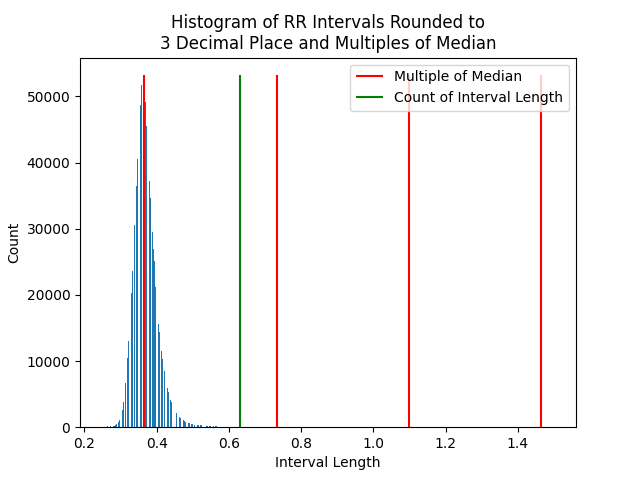

In [36]:
fig = plt.figure()
plt.hist(rounded_intervals, bins=23*10**(cutoff-1))
plt.vlines( [i*med for i in range(1,5)], 0, max( rounded_intervals.value_counts() ), color="red", linewidth=1.5 )

plt.vlines(  R1_upper, 0, max( rounded_intervals.value_counts() ), color="green"  )

plt.xlabel("Interval Length")
plt.ylabel("Count")
plt.legend(["Multiple of Median", "Count of Interval Length"], loc="upper right")
plt.title("Histogram of RR Intervals Rounded to\n"+str(cutoff)+" Decimal Place and Multiples of Median")

In [31]:
np.mean(rounded_intervals)

0.37095711606566467

In [32]:
np.mean( rounded_intervals[ rounded_intervals < 0.5 ] )

0.3688223698588866

In [33]:
print(np.median(rounded_intervals))
print(np.median(rounded_intervals[ rounded_intervals < 0.5 ]))

0.366
0.366


In [34]:
print( len(rounded_intervals[rounded_intervals < 0.5]) / len(rounded_intervals) )
print( len(rounded_intervals[rounded_intervals >= 0.5]) / len(rounded_intervals) )

0.9911489680919733
0.008851031908026727


In [6]:
# TASK 4a: WRITE THE THRESHOLDED INTERVALS TO A FILE
lower = 0.25
upper = 1.5
parts = ["1a", "1b", "1c", "1d", "1e"]
out_df = pd.read_csv(rr_folder+"/rr_intervals_"+parts.pop(0)+".csv")
for part in parts:
    out_df = out_df.append(pd.read_csv(rr_folder+"/rr_intervals_"+part+".csv"), ignore_index=True)


In [7]:
filt = (out_df["interval"] < 1.5) & (out_df["interval"] > 0.25)
filt.value_counts()

True     3439260
False       6569
Name: interval, dtype: int64

In [9]:
out_df.loc[filt].to_csv("test_concatenated_rr_intervals/rr_intervals_1.csv", index=False)

In [6]:
# TASK 3: INSPECT INTERVALS OF LENGTH BETWEEN 2 AND 15 SECONDS, SEE WHAT TENDS TO BE DUE TO MISSING DATA VS. DUE TO MISSED BEATS
# Addendum: Inspect intervals greater than 15 seconds as well, and test higher thresholds if need be

In [5]:
part = "1c"

In [6]:
# Load in the signal
print("Loading " + part + "; " + str(virtual_memory()[2])+" percent memory usage")
cols = coldict["raw_waves_data_"+part+".csv"]

df = pd.read_csv("../../Deidentified-Raw-Waveforms/raw_waves_data_"+part+".csv", usecols=cols)
times = df["time"]

signal = pd.Series(df[cols[1]])
i=2
while True:
    try:
        signal = signal.combine_first(df[cols[i]])
        i+=1
    except IndexError:
        break
signal = signal.fillna(method="ffill")
signal = pd.to_numeric(signal)

# Delete the dataframe to save space
del df
collect_garbage()
print("Signal loaded in; " + str(virtual_memory()[2])+" percent memory usage")

# Make a copy of the raw signal for comparison purposes
raw_signal = signal.copy(deep=True)

# Get rid of spikes and troughs in the signal
delta = 125
filt = (signal <= -10) | (signal >= 10)
filt.loc[~filt] = np.nan
filt.fillna(method="ffill", limit=delta, inplace=True)
filt.fillna(method="bfill", limit=delta, inplace=True)
filt.fillna(value=False, inplace=True)

signal.loc[filt] = np.nan
signal.fillna(method="ffill", inplace=True)
print("Troughs and spikes removed; "+ str(virtual_memory()[2])+" percent memory usage")

Loading 1c; 31.5 percent memory usage
Signal loaded in; 47.7 percent memory usage
Troughs and spikes removed; 52.0 percent memory usage


In [7]:
# Load in the RR intervals
spikes = pd.read_csv(rr_folder + "rr_intervals_"+part+".csv")


In [8]:
lo=15
hi=np.infty
filt = (spikes["interval"] > lo) & (spikes["interval"] < hi)
filtered_spikes = spikes.loc[filt]

In [9]:
regular_spikes = spikes.loc[~filt]

In [10]:
print(len(filtered_spikes["interval"]))

12


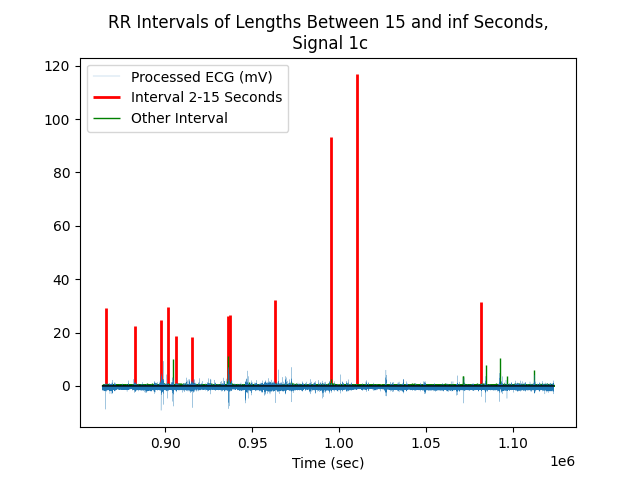

In [11]:
fig = plt.figure()
plt.plot(times, signal, linewidth=.15)
plt.vlines(filtered_spikes["time"], 0, filtered_spikes["interval"], linewidth=2, color="red")
plt.vlines(regular_spikes["time"], 0, regular_spikes["interval"], linewidth=1, color = "green")
plt.title("RR Intervals of Lengths Between "+str(lo)+" and "+str(hi)+" Seconds,\n Signal "+part)
plt.xlabel("Time (sec)")
plt.legend(["Processed ECG (mV)", "Interval 2-15 Seconds", "Other Interval"], loc="upper left")
plt.plot(times, [0 for t in times], color="black", linewidth=1)
plt.show()

In [17]:
# TASK 2: SEE WHAT THE TAIL OF THE DISTRIBUTION LOOKS LIKE

In [ ]:
parts = ["1a", "1b", "1b", "1d", "1e"]

In [ ]:
# This grabs all of the RR intervals from all of the parts and puts them into a pd.Series
rr_intervals = []
for part in parts:
    df = pd.read_csv("rr_intervals_corrected/rr_intervals_"+part+".csv")
    rr_intervals += list(df["interval"])
    del df
    collect_garbage()
    print(virtual_memory())
rr_intervals = pd.Series(sorted(rr_intervals))

In [37]:
lower = 15
upper = np.inf
filt = (rr_intervals >= lower) & (rr_intervals <= upper)
filtered_rr_intervals = rr_intervals[filt]

x_lo = lower
x_hi = max(filtered_rr_intervals) + .5


In [38]:
print(rr_intervals.describe())
print(rr_intervals.mode())

count    3.435906e+06
mean     3.771921e-01
std      3.099282e+00
min      3.542566e-02
25%      3.520427e-01
50%      3.675478e-01
75%      3.853397e-01
max      4.788056e+03
dtype: float64
0    0.37125
dtype: float64


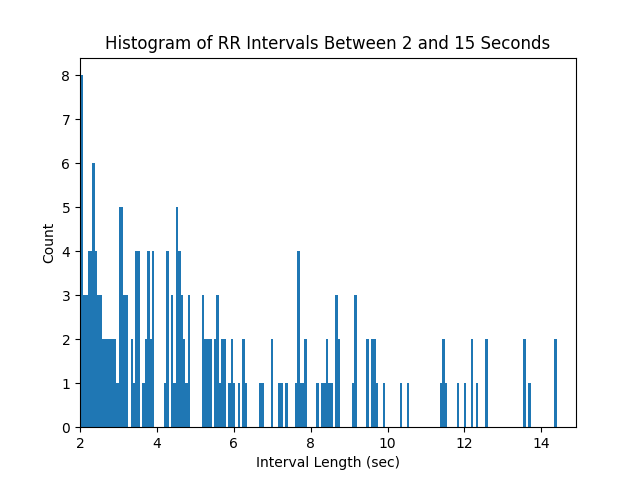

svmem(total=12655771648, available=6217723904, percent=50.9, used=6438047744, free=6217723904)

In [42]:
fig = plt.figure()
plt.hist(filtered_rr_intervals, bins=200)
plt.xlabel("Interval Length (sec)")
plt.xlim(x_lo, x_hi)
plt.ylabel("Count")
plt.title("Histogram of RR Intervals Between " + str(lower) + " and "+str(upper)+" Seconds")
plt.show()
virtual_memory()

In [44]:
num=len(filtered_rr_intervals)
print("There are "+str(num)+" intervals of lengths between 2 and 15 seconds, and after this, everything appears to be due to missing data")

There are 203 intervals of lengths between 2 and 15 seconds, and after this, everything appears to be due to missing data


In [ ]:
# TASK 1: INSPECT MULTIMODALITY UNDER SOME THRESHOLD

In [ ]:
parts = ["1a", "1b", "1b", "1d", "1e"]

In [ ]:
# This grabs all of the RR intervals from all of the parts and puts them into a pd.Series
rr_intervals = []
for part in parts:
    df = pd.read_csv("rr_intervals_corrected/rr_intervals_"+part+".csv")
    rr_intervals += list(df["interval"])
    del df
    collect_garbage()
    print(virtual_memory())
rr_intervals = pd.Series(sorted(rr_intervals))

In [12]:
upper = 2.5
filt = (rr_intervals <= upper)
filtered_rr_intervals = rr_intervals[filt]

x_lo = 0
x_hi = max(filtered_rr_intervals) + .5

In [14]:
print(filtered_rr_intervals.describe())

count    3.435430e+06
mean     3.713103e-01
std      3.894822e-02
min      3.542566e-02
25%      3.520403e-01
50%      3.675437e-01
75%      3.853304e-01
max      2.475397e+00
dtype: float64


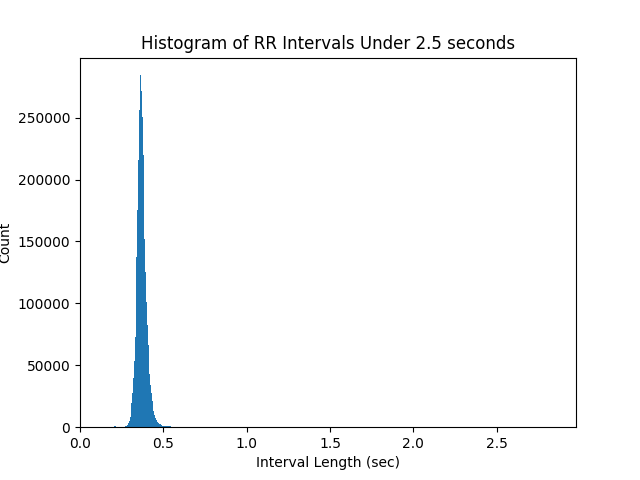

svmem(total=12655771648, available=6914494464, percent=45.4, used=5741277184, free=6914494464)

In [15]:
fig = plt.figure()
plt.hist(filtered_rr_intervals, bins=500)
plt.xlim(x_lo, x_hi)
plt.xlabel("Interval Length (sec)")
plt.ylabel("Count")
plt.title("Histogram of RR Intervals Under "+str(upper)+" seconds")
plt.show()
virtual_memory()

In [23]:
virtual_memory()

svmem(total=12655771648, available=7602061312, percent=39.9, used=5053710336, free=7602061312)

In [12]:
for i in range(1,10):
    print(0.366 * i)

0.366
0.732
1.0979999999999999
1.464
1.83
2.1959999999999997
2.562
2.928
3.294
